## Classification of Curves

The following notebook shows the weather curves of different world cities and classify them according to the characterstic of curves. It covers the concept of- 
* Functinal data analysis
* Principal component analysis
* K-means

#### Libraries used - 
* numpy - for numerical analysis
* urlib2 - getting weather data online
* scipy - for scientific analysis of curves
* matplotlib - for plotting

In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
stationID = {}
with open('largeDataset.csv') as csvfile:
    rows = csv.reader(csvfile)
    for i,row in enumerate(rows):
        stationID[str(i)] = row[0]

Most of the cities are from Canada, US and India. It is mapped to the respective airport code of cities for getting data from the website :

<http://wunderground.com/>

In [3]:
stationID

{'1200': 'VBSY',
 '1175': 'RJOM',
 '1183': 'ROAH',
 '1144': 'RJOI',
 '1162': 'RJFY',
 '1218': 'VTUS',
 '1145': 'RJOO',
 '344': 'EBCI',
 '0': 'CYTZ',
 '346': 'EBBR',
 '347': 'EBBT',
 '340': 'EBOS',
 '341': 'EBMT',
 '342': 'EBGT',
 '343': 'EBCV',
 '810': 'LTAJ',
 '811': 'LTCH',
 '812': 'LTCC',
 '813': 'LTCJ',
 '348': 'EBFS',
 '349': 'EBBE',
 '816': 'LTAI',
 '817': 'LTAG',
 '595': 'LHMC',
 '1149': 'RJOW',
 '719': 'LIQZ',
 '718': 'LIBD',
 '717': 'LIRT',
 '716': 'LIBA',
 '715': 'LIRM',
 '714': 'LIBS',
 '713': 'LIRE',
 '712': 'LIRH',
 '711': 'LIRL',
 '710': 'LIRF',
 '915': 'OAZG',
 '914': 'OAFR',
 '606': 'LHBC',
 '917': 'OEMH',
 '594': 'EPRZ',
 '736': 'LICR',
 '916': 'OAKN',
 '1182': 'ROKJ',
 '1061': 'RCDC',
 '911': 'OAKB',
 '1063': 'RCPO',
 '1062': 'RCLG',
 '1065': 'RCQS',
 '1064': 'RCSQ',
 '619': 'LWOH',
 '910': 'OAHR',
 '913': 'OASD',
 '298': 'BGAT',
 '299': 'BGAM',
 '296': 'BGSC',
 '297': 'BGCO',
 '294': 'BGDH',
 '295': 'BGDB',
 '292': 'BGJH',
 '293': 'BGAS',
 '290': 'BGFH',
 '291': 'BGB

In [4]:
# res="{"
# for key in stationID:
#     res = res + ", "+ key
# res

In [5]:
initialYear = 2001
endyear = 2003 

weatherUtils is the custom library used for - 
* fetching data from the weather website and saved them as CSV
* get 15 days average for the mentioned year
* get smooth curves from data points and plot them
* extract the characterstic and features which will later be used for classification and further analysis

<https://github.com/ayushshukla92/Functional-Data-Analysis/tree/master/Python/Data/Week5/wunderground/weatherUtils>

In [6]:
from weatherUtils.fda import fda

In [7]:
# import matplotlib.pyplot as plt
# from pylab import *
# import numpy as np
# import seaborn as sns
# matplotlib.rcParams['figure.figsize'] = (15, 150)

# X_initial = []
# cityMap = {}
# k = 0
# size = len(stationID)-2
# city_curve = {}
# for key in stationID:
#     city = key
#     code = stationID[key]
#     curStationData = fda(initialYear,endyear,city,code)
#     curX = curStationData.getFeatureVector()
#     if curX is not None and len(curX) == 1000:
#         x = np.linspace(0,23,1000)
#         ax1 = subplot(size,3,k+1)
#         ax1.plot(x,curX)
#         ax1.set_ylim([-30,40])
#         ax1.set_title(city)
# #         ax1.grid()
#         city_curve[city] = curX
        
#         X_initial.append(curX)
#         cityMap[k] = city
#         k = k+1
        
# sns.plt.plot()



No data found for : 1200
No data found for : 1218
No data found for : 0
No data found for : 341
No data found for : 811
No data found for : 595
No data found for : 719
No data found for : 714
No data found for : 915
No data found for : 914
No data found for : 606
No data found for : 916
No data found for : 1061
No data found for : 1063
No data found for : 1062
No data found for : 1065
No data found for : 1064
No data found for : 910
No data found for : 913
No data found for : 296
No data found for : 297
No data found for : 590
No data found for : 199
No data found for : 198
No data found for : 597
No data found for : 596
No data found for : 193
No data found for : 272
No data found for : 738
No data found for : 1067
No data found for : 527
No data found for : 1014
No data found for : 599
No data found for : 1017
No data found for : 994
No data found for : 1013
No data found for : 1234
No data found for : 448
No data found for : 1230
No data found for : 1231
No data found for : 1233
No 

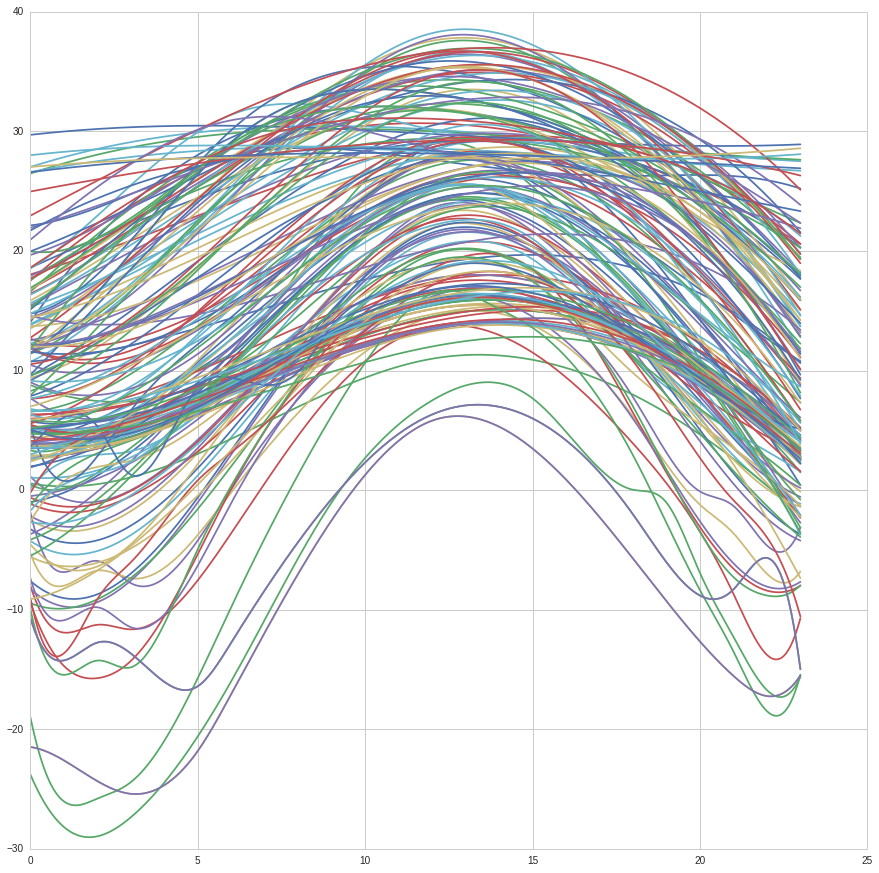

In [8]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (15,15)
sns.set_style("whitegrid")

X_initial = []
cityMap = {}
k = 0
size = len(stationID)-2
city_curve = {}

plots = []
for key in stationID:
    city = key
    code = stationID[key]
    curStationData = fda(initialYear,endyear,city,code)
    curX = curStationData.getCurve()
    if curX is not None and len(curX) == 1000:
#         
#         ax1 = subplot(size,3,k+1)
#         ax1.plot(x,curX)
        plots.append(curX)
#         ax1.set_ylim([-30,40])
#         ax1.set_title(city)
#         ax1.grid()
        city_curve[city] = curX
#         
        X_initial.append(curX)
        cityMap[k] = city
        k = k+1
x = np.linspace(0,23,1000)
for k,plot in enumerate(plots):
    sns.plt.plot(x,plot)
sns.plt.savefig('curves.png')
# sns.plt.plot()



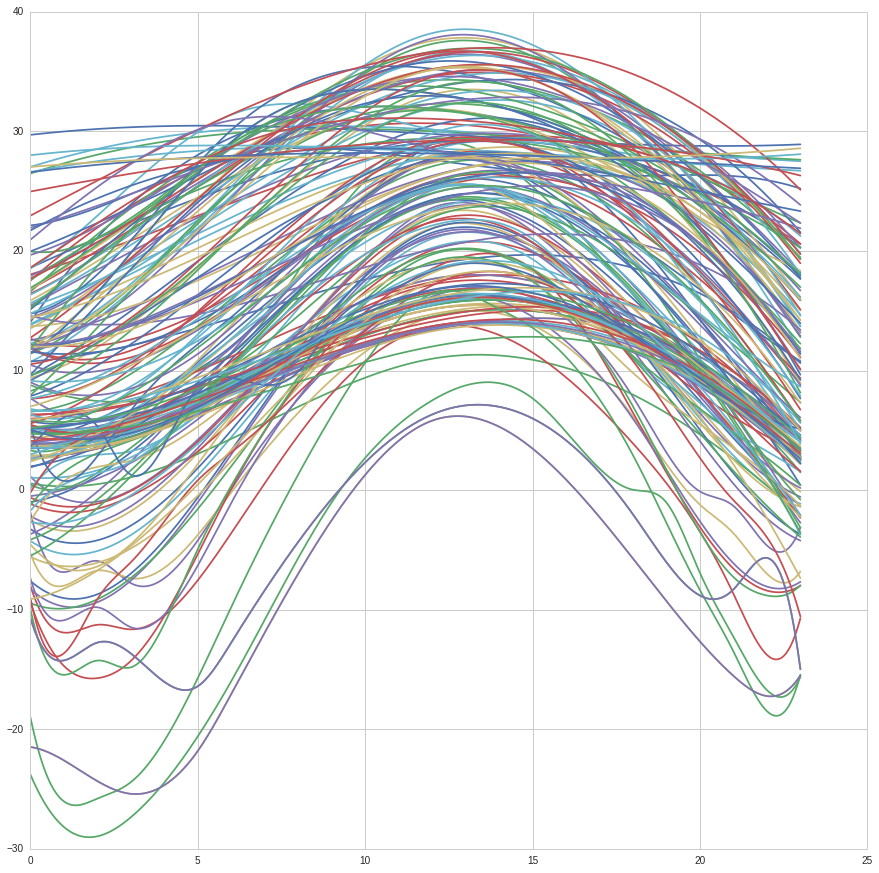

In [9]:
x = np.linspace(0,23,1000)
for k,plot in enumerate(plots):
    sns.plt.plot(x,plot)
sns.plt.savefig('curves.png')

In [10]:
cityMap

{0: '810',
 1: '812',
 2: '816',
 3: '195',
 4: '194',
 5: '196',
 6: '191',
 7: '190',
 8: '192',
 9: '526',
 10: '520',
 11: '521',
 12: '522',
 13: '523',
 14: '1015',
 15: '528',
 16: '529',
 17: '1232',
 18: '1002',
 19: '1236',
 20: '854',
 21: '856',
 22: '857',
 23: '850',
 24: '851',
 25: '852',
 26: '858',
 27: '1081',
 28: '848',
 29: '844',
 30: '1085',
 31: '92',
 32: '815',
 33: '740',
 34: '237',
 35: '1051',
 36: '1057',
 37: '1',
 38: '142',
 39: '148',
 40: '149',
 41: '1007',
 42: '947',
 43: '942',
 44: '768',
 45: '131',
 46: '135',
 47: '134',
 48: '1243',
 49: '927',
 50: '933',
 51: '932',
 52: '931',
 53: '930',
 54: '1178',
 55: '829',
 56: '797',
 57: '794',
 58: '7',
 59: '1246',
 60: '241',
 61: '240',
 62: '249',
 63: '248',
 64: '926',
 65: '510',
 66: '456',
 67: '979',
 68: '179',
 69: '176',
 70: '174',
 71: '173',
 72: '973',
 73: '1080',
 74: '253',
 75: '180',
 76: '187',
 77: '1089',
 78: '1088',
 79: '11',
 80: '10',
 81: '13',
 82: '12',
 83: '15

### Visualizing graphs
Here we can see the smooth curves drawn from the functional data points. These are B-spline curves with third degree polynomial and suitable number of knots (to avoid noises). The key point here is that there are some plots with no curves/data points. It is because of unavilability of data for the mentioned given years. Therefore it won't get classified.

In [66]:
    def getDerivative(curve):
    	der = []
    	for i in xrange(1,len(curve)-1):
    		der.append(1000*(curve[i] - curve[i-1]))

    	return der



    def getFeatures(points):

    	features = []
    	features.append(max(points))
#     	features.append(points.index(max(points)))
    	features.append(min(points))
#     	features.append(points.index(min(points)))
    	features.append(max(points) - min(points))

    	der = getDerivative(points)

    	features.append(max(der))
    	features.append(min(der))

    	# no of extremum
    	count = 0
    	for i in xrange(1,len(points)-2):
    		if points[i]>points[i-1] and points[i]>points[i+1]:
    			count = count+1

    	features.append(count)
    	return features

In [67]:
feature_vec = []
for item in X_initial:
    feature_vec.append(getFeatures(item.tolist()))

In [68]:
X = np.array(feature_vec)

In [69]:
X.shape       # the initial shape of the predictor

(182, 6)

### PCA
So after the dimensionality reduction through singualar vector decomposition, the dimension of the predictor reduced from 24 x 1000 to 24 x 24

In [70]:
# from sklearn.decomposition import PCA


In [71]:
# pca = PCA()

In [72]:
# pca.fit(X)
# X = pca.transform(X)
# X.shape

### Shape of the curve as a feature
Our classification also depends on the shape of the curve. So we are taking the shape as our feature vector of dimension equal to no of training examples

In [73]:
# X_shape = np.zeros(np.array(X_initial).shape)
# for i,row in enumerate(X_initial):
#     diff = row[0]-0
#     for j,col in enumerate(row):
#         X_shape[i][j] = X_initial[i][j] - diff
# pca = PCA()
# pca.fit(X_shape)
# X_shape = pca.transform(X_shape)


In [74]:
# X_final = []
# n = X.shape[0]
# for i in xrange(n):
#     X_final.append(np.concatenate([X[i],X_shape[i]]))
# X_final = np.array(X_final)


In [75]:
X_final = X

### K-Means
This is the unsupervised learning algorithm for clustering. Here we are taking the number of clusters as 2 (though we can take more than this depending upon situtation)

In [97]:
n_clusters = 7

In [98]:
from sklearn.cluster import KMeans

In [99]:
est = KMeans(n_clusters=n_clusters)

In [100]:
est.fit(X_final)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [101]:
labels = est.labels_

In [102]:
city_class_map = {}
for num,label in enumerate(labels):
    city_class_map[cityMap[num]] = label

In [103]:
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)
def plot_class(class_a,num):
    sns.plt.ylim([-30,40])
    x = np.linspace(0,23,1000)
    for k,city in enumerate(class_a):
        plots.append(city_curve[city])
        sns.plt.plot(x,city_curve[city])
    #sns.plt.legend(class_a)
    sns.plt.plot()
    sns.plt.savefig("class"+str(num)+'.png')
    

In [104]:
rep_curves = []

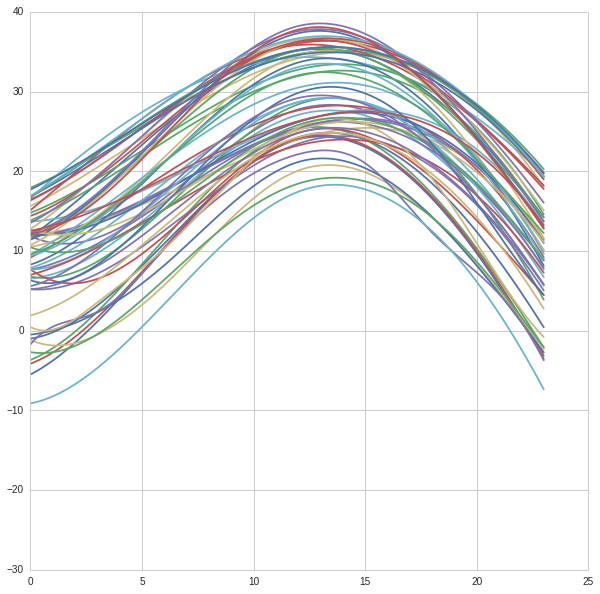

In [105]:
class_a = [city for city in city_class_map if city_class_map[city] == 0]    # Members of class 0
plot_class(class_a,1)
rep_curves.append(city_curve[class_a[0]])

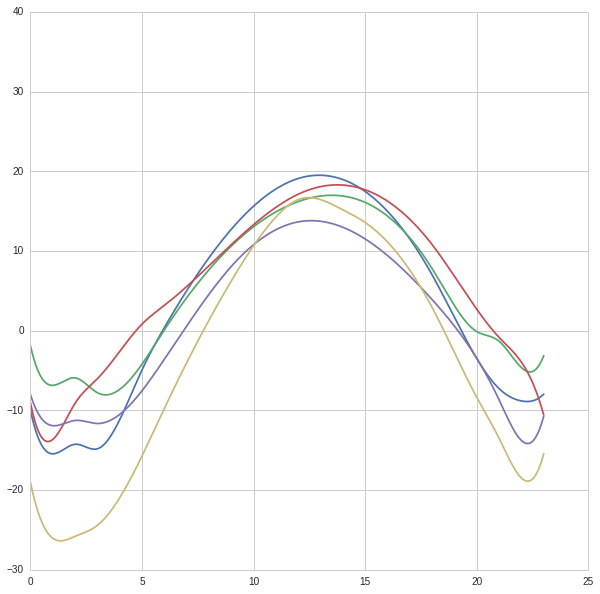

In [106]:
class_b = [city for city in city_class_map if city_class_map[city] == 1]    
plot_class(class_b,2)
rep_curves.append(city_curve[class_b[0]])

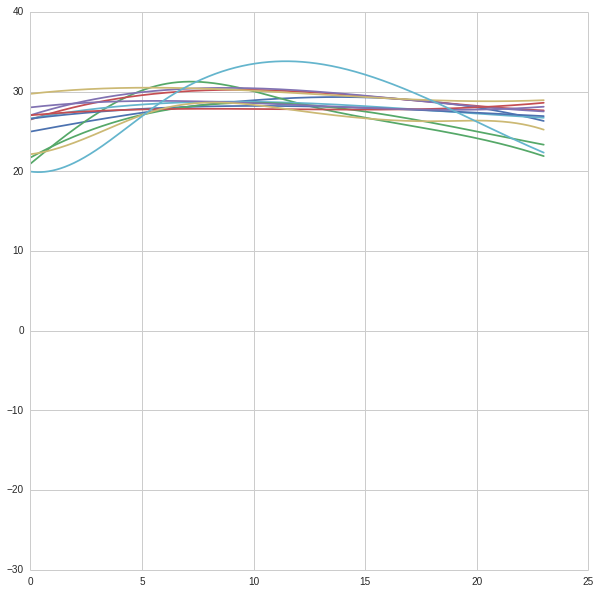

In [107]:
class_c = [city for city in city_class_map if city_class_map[city] == 2]    
plot_class(class_c,3)
rep_curves.append(city_curve[class_c[0]])

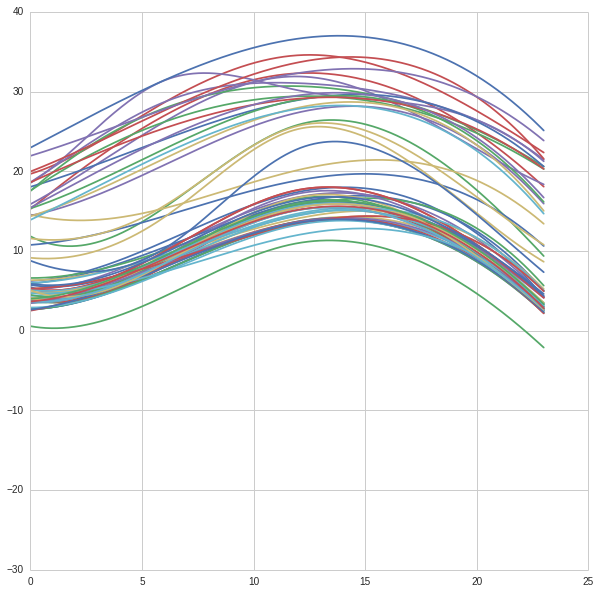

In [108]:
class_d = [city for city in city_class_map if city_class_map[city] == 3]    # Members of class 3
plot_class(class_d,4)
rep_curves.append(city_curve[class_d[0]])

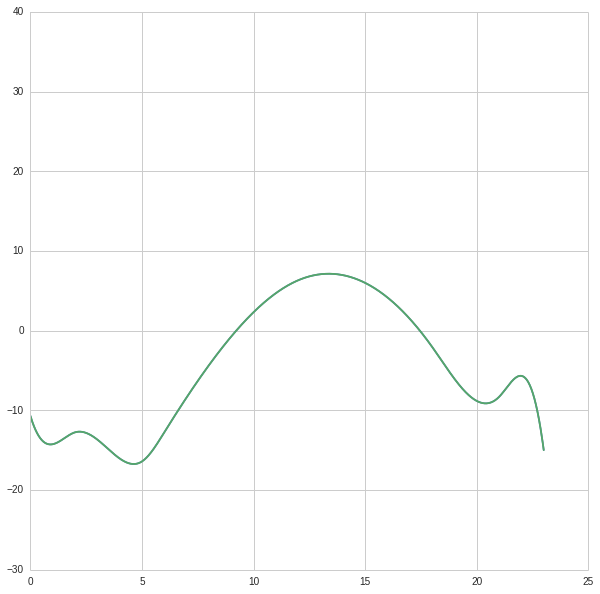

In [109]:
class_e = [city for city in city_class_map if city_class_map[city] == 4]    # Members of class 3
plot_class(class_e,5)
rep_curves.append(city_curve[class_e[0]])

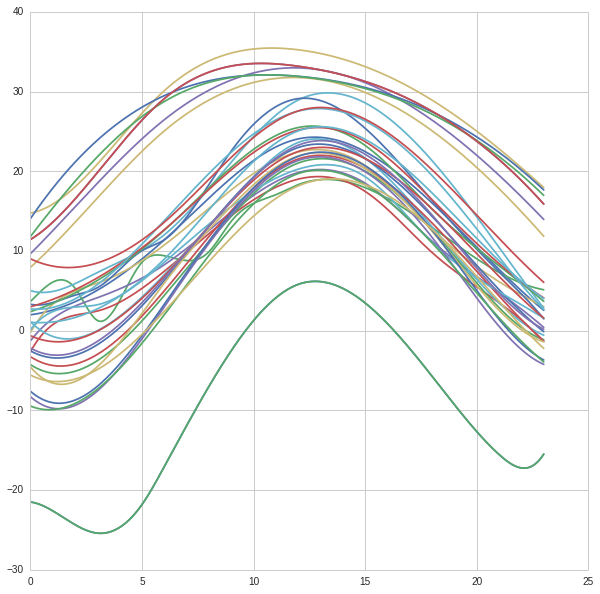

In [110]:
class_f = [city for city in city_class_map if city_class_map[city] == 5]    # Members of class 6
plot_class(class_f,6)
rep_curves.append(city_curve[class_f[0]])

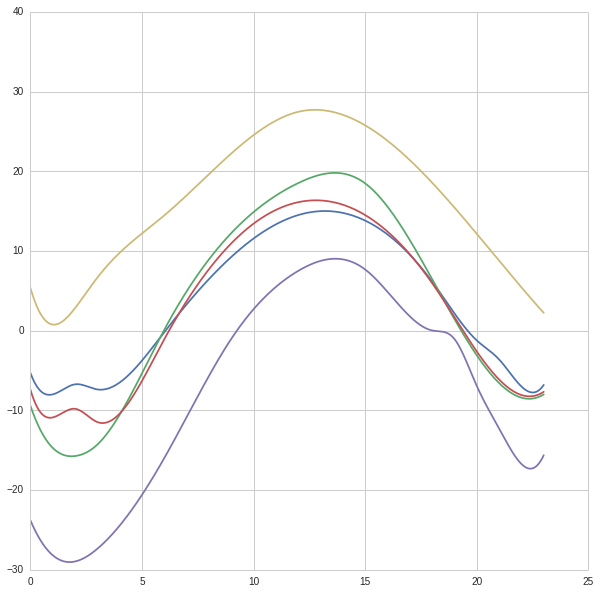

In [112]:
class_g = [city for city in city_class_map if city_class_map[city] == 6]    # Members of class 6
plot_class(class_g,7)
rep_curves.append(city_curve[class_g[0]])

IndexError: list index out of range

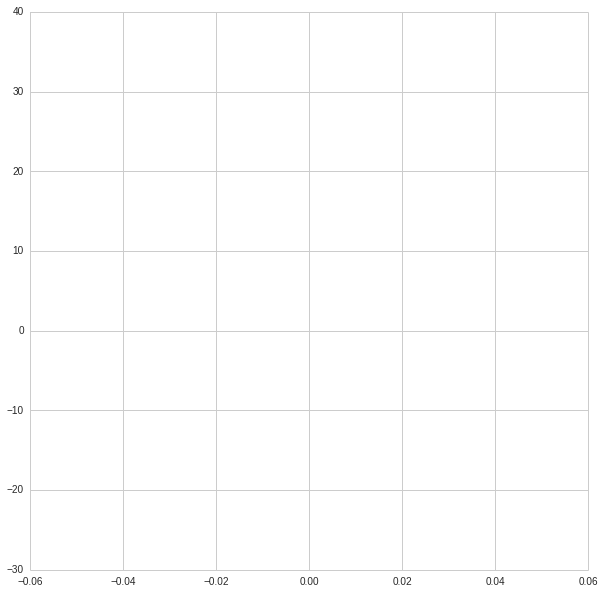

In [113]:
class_g = [city for city in city_class_map if city_class_map[city] == 7]    # Members of class 6
plot_class(class_g,7)
rep_curves.append(city_curve[class_g[0]])

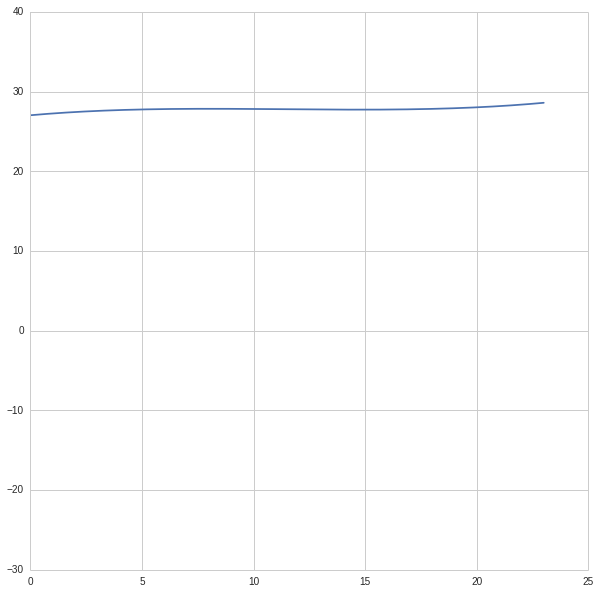

In [49]:
class_g = [city for city in city_class_map if city_class_map[city] == 8]    # Members of class 6
plot_class(class_g,7)
rep_curves.append(city_curve[class_g[0]])

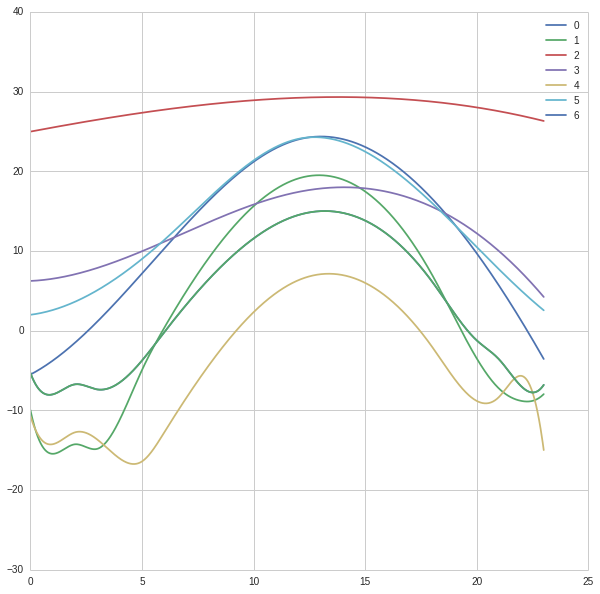

In [114]:
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)

sns.plt.ylim([-30,40])
x = np.linspace(0,23,1000)
leg_ = range(n_clusters)
for k,city in enumerate(rep_curves):
    plots.append(rep_curves[k])
    sns.plt.plot(x,rep_curves[k])
sns.plt.legend(leg_)
sns.plt.plot()
sns.plt.savefig("representatives"+str(num)+'.png')

In [ ]:
rep_classes